In [1]:
#Load the Dataset
import pandas as pd

file_path = 'commentary_2023.csv'
data = pd.read_csv(file_path)

# Inspect the data
print("Dataset loaded successfully. Shape:", data.shape)
print(data.head())




Dataset loaded successfully. Shape: (375, 2)
   Unnamed: 0                                         commentary
0          19  Travis Head | Player of the Match - 137(120): ...
1          20  Adam Zampa: Interesting to see the strategy to...
2          21  Mitchell Starc: He (Cummins) was phenomenal, h...
3          22  Steve Smith: Incredible feeling! Atmosphere wa...
4          23  Mitch Marsh: Pure elation right now. Been the ...


In [2]:
#Select and Load a Hugging Face Model
from transformers import pipeline

# Load pre-trained sentiment-analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Perform Sentiment Analysis
# Analyze sentiment for each commentary
data['sentiment'] = data['commentary'].apply(lambda text: sentiment_analyzer(text)[0]['label'])

# Save updated dataset
updated_file_path = 'updated_commentary_2023.csv'
data.to_csv(updated_file_path, index=False)
print(f"Updated dataset saved at {updated_file_path}")

Device set to use cpu


Updated dataset saved at updated_commentary_2023.csv


C:\Users\Acer\AppData\Local\Temp\ipykernel_20948\1334687070.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


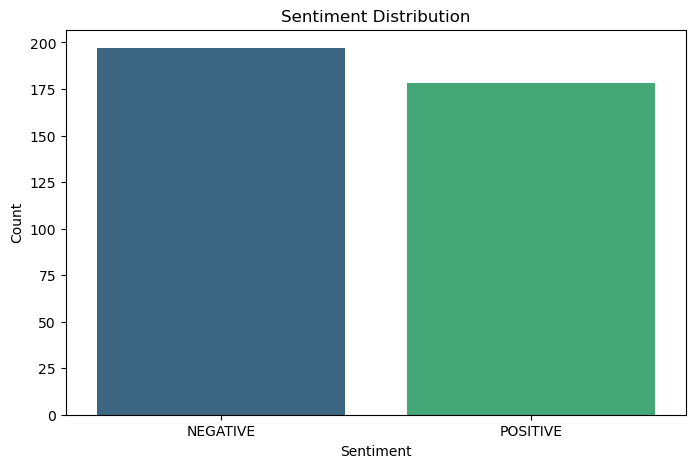

In [3]:
# Visua
# lize Sentiment Spread
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()